In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget
import math

In [2]:
file = 'newtonraphson.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file

--File found---


In [3]:
Data = pd.read_csv(Path_,sep=',')
Data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


In [4]:
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [5]:
def Lagrange(x,xi,j):
    prod = 1.0
    for i in range(len(xi)):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
    return prod

def Poly(x,xi,yi):
    Sum = 0.
    for j in range(len(xi)):
        Sum += yi[j]*Lagrange(x,xi,j)
    return Sum

x = np.linspace(0,np.max(X),100)
y = Poly(x,X,Y)

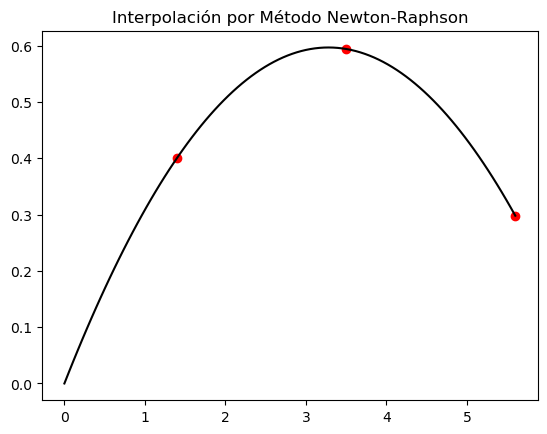

In [6]:
plt.figure()
plt.title("Interpolación por Método Newton-Raphson")
plt.scatter(X,Y,color='r')
plt.plot(x,y,color='k')

In [7]:
x= sym.Symbol("x")
f = Poly(x,X,Y).expand()

$$y(x)= y_o + tan\theta x -\frac{1}{2}\frac{g}{V^2_{ox}}x^2$$

In [8]:
f

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.77555756156289e-17

Por tanto:
$$$$
$$tan\theta x = 0.363970234266202𝑥$$
$$$$
$$tan\theta= 0.363970234266202$$
$$$$
$$\theta= arctan(0.363970234266202)$$

In [9]:
theta=np.arctan(0.363970234266202)
angulo=round(math.degrees(theta))

$$-0.0554912422401579𝑥^2=-\frac{1}{2}\frac{g}{V^2_{ox}}x^2$$
$$$$
$$0.0554912422401579=\frac{g}{2*V^2_{ox}}$$
$$$$
$$V^2_{ox}=\frac{g}{2*0.0554912422401579}$$
$$$$
$$V_{ox}=\sqrt{\frac{g}{2*0.0554912422401579}}$$

In [10]:
g=9.8
Vox= (g/(2*0.0554912422401579))**0.5

$$V_{ox}= V_oCos\theta \therefore V_o= \frac{V_{ox}}{Cos\theta}$$

In [11]:
Velocidad= round(Vox/np.cos(theta))

In [12]:
print("El ángulo inicial theta de la trayectoria es "+str(angulo)+"° y la velocidad inicial Vo es "+ str(Velocidad)+" m/s")

El ángulo inicial theta de la trayectoria es 20° y la velocidad inicial Vo es 10 m/s
